###【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


- Home Creditはどのような企業？
- このコンペティションでは何を予測する？
- それを予測することで企業が得られるメリットは何？

####【問題1 解答】
- Home Creditはどのような企業？
```
電話や取引情報を含むさまざまな代替データを基に、顧客の返済能力を予測するサービスを提供。
```
- このコンペティションでは何を予測する？
```
顧客の返済能力（TARGET変数の確率）
```
- それを予測することで企業が得られるメリットは何？
```
返済能力のある顧客が無事借入できること、そして顧客がより確実に返済完了できるような借入額、完済日、返済スケジュールを提供することが可能となる
```


###【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。


- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスの割合がわかるグラフを描く

それぞれ結果に対する説明や考察も行ってください。

In [1]:
import numpy as np

#google driveのモジュールをインポート
from google.colab import drive
#google driveのマウント
drive.mount('/content/drive')

csv_path = "drive/My Drive/DIVE INTO CODE/Week3/application_train.csv" # ファイル名（パス）を指定する

import pandas as pd
df = pd.read_csv(csv_path)

df = df.iloc[:10000, :]   #データ数を削減

Mounted at /content/drive


In [2]:
pd.set_option("display.max_columns", 100)   #列数が130以上の場合、表示を省略
pd.set_option("display.max_rows", 130)   #行数が130以上の場合、表示を省略

print("df.head():")
display(df.head())
print("\n")
#df.info()
print("df.dtypes:\n{}".format(df.dtypes))
print("\n")
print("df.describe():\n{}".format(df.describe()))
print("\n")
print("df.isnull():\n{}".format(df.isnull()))
print("\n")
print("df.sum():\n{}".format(df.sum()))
print("\n")
print("df.isnull().sum():\n{}".format(df.isnull().sum()))

df.head():


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /



df.dtypes:
SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE            

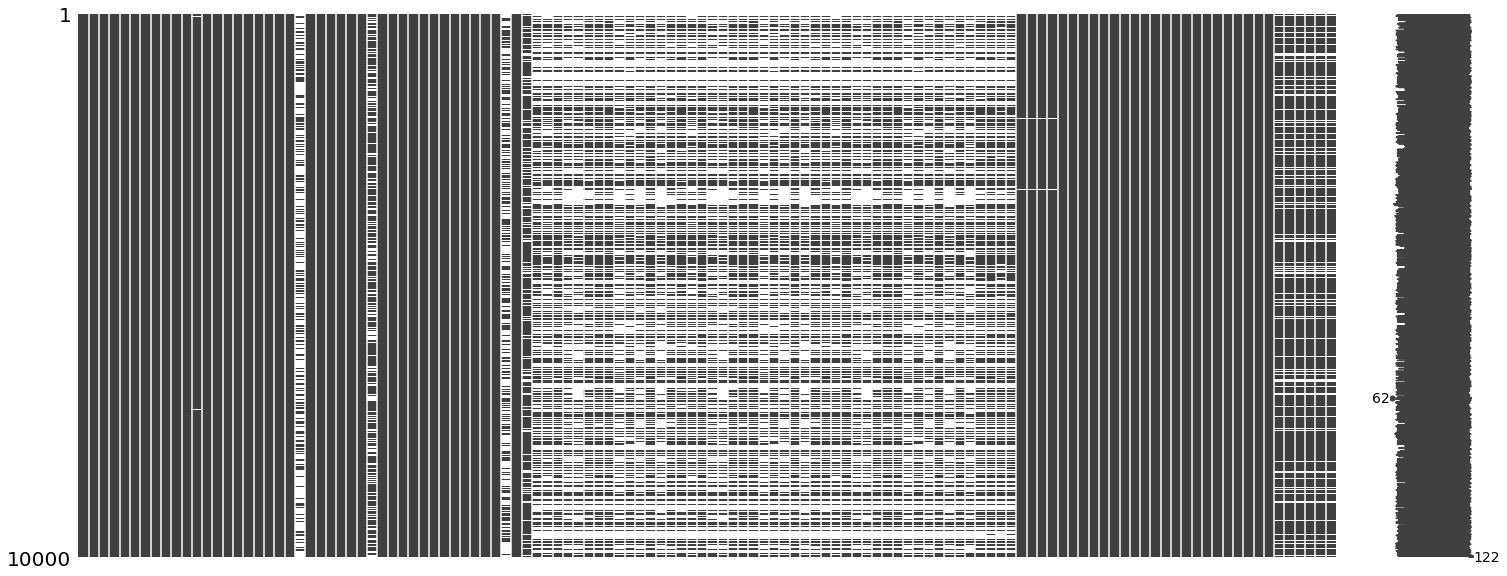

In [3]:
import missingno as msno

#各特徴量の欠損値の有無を確認する。
msno.matrix(df)

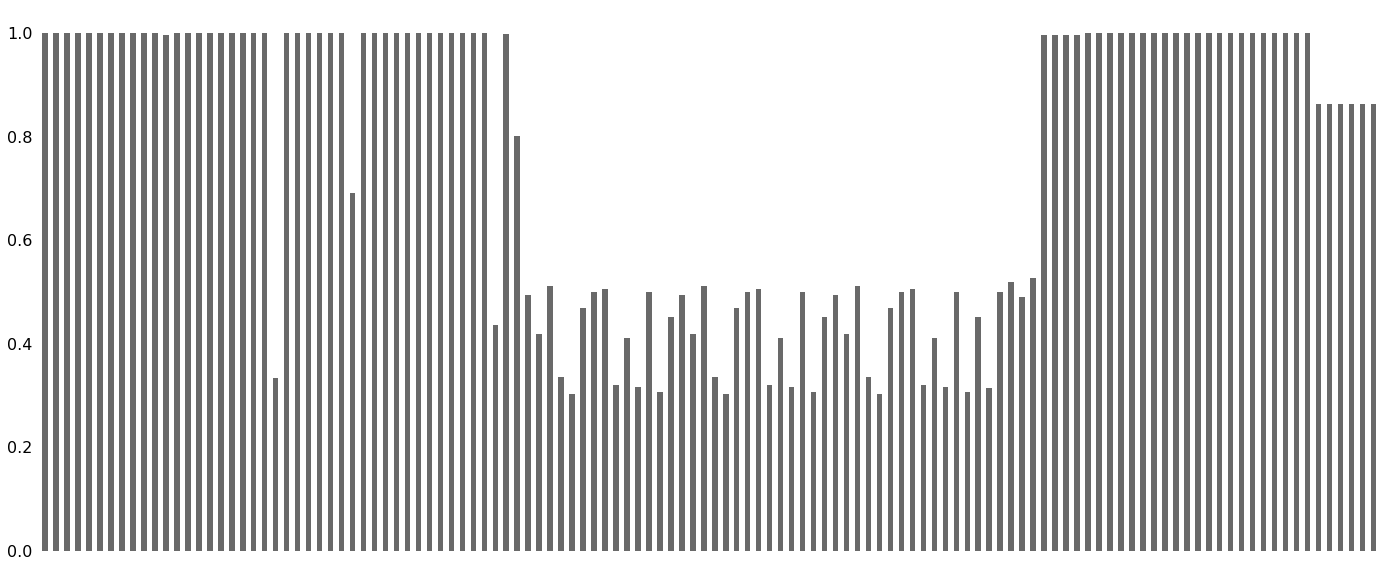

In [4]:
#欠損値が何パーセント含まれるかを確認する。
msno.bar(df)

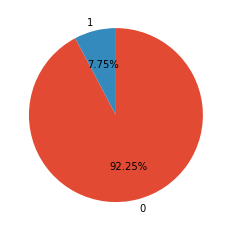

In [5]:
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')


#各ラベルの割合の円グラフを描画
#fig1, ax1 = plt.subplots(figsize=(8, 10), dpi=70)
fig0, ax0 = plt.subplots()

#labes_list = [0, 1] #TARGET変数の種類
target_ser = pd.Series(df.loc[:, "TARGET"])
value_count_ser = target_ser.value_counts()   #TARGET変数の各値のデータ数をカウント
ax0.pie(value_count_ser, labels=value_count_ser.index, startangle=90, counterclock=False, autopct="%1.2f%%");

####【問題2 解答】
- データの概観に関する考察
      ・顧客が住んでいる住居の広さ（APARTMENTS_AVG）等の特徴量のデータが多数欠損しているので、これらの列は削除したほうが良いと思われる。
      ・「HomeCredit_columns_description.csv」によれば、「TARGET」変数には支払いが困難か否かの情報が記載されており、
      　ローンの最初のY回の分割払いの少なくとも1つでX日以上支払いが遅れた場合に支払い困難（=1）と判断される。
      　従って、このTARGET変数が正解ラベルとなる。
      ・TARGET変数の円グラフより、顧客全体の約1割が返済能力が不足している(=1)と判断されている。

###【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

####【問題3 解答】
- TARGET変数との相関が大きい特徴量を探してみる必要がある。
- 特徴量の種類が多いため、問題2の解答欄に記載した通り欠損の多い特徴量を削除したり、TARGET変数以外の間で互いに相関の大きい変数を削除したりする必要がある。
- 「HomeCredit_columns_description.csv」のTARGET変数の説明欄には、支払いが困難か否かの判断基準として、ローンの最初のY回の分割払いの少なくとも1つでX日以上支払いが遅れることが記載されている。しかし、ローンの遅延状況を直接示す特徴量は見当たらないため、支払いの遅延につながる可能性のある情報を特徴量の中からピックアップし、分析に使用する特徴量を限定してみるのも良い。

###【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [6]:
#欠損値の多い列を削除し、欠損値を含む行を削除

null_num_ser = df.isnull().sum()

# print(null_num_ser)
# print(type(null_num_ser))

#df3 = pd.DataFrame(index=[], columns=[])
df2 = df.copy()

#2000個以上欠損値がある特徴量（列）は削除する。
threshold_del = 2000

for key in df.columns:
    if (null_num_ser[key] >= threshold_del ):
        df2 = df2.drop(labels=key, axis=1)


pd.set_option("display.max_rows", 130)   #行数が130以上の場合、表示を省略

# print("\n")
# print("df:")
# display(df)
# print("df.isnull().sum()")
# display(df.isnull().sum())

print("\n")
print("df2:")
display(df2)
print("df2.isnull().sum()")
display(df2.isnull().sum())



df2:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,111629,0,Revolving loans,F,Y,Y,1,135000.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019689,-11454,-2699,-2037.0,-1247,1,1,0,1,0,0,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.589959,0.515495,7.0,1.0,7.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
9996,111630,0,Cash loans,F,Y,Y,0,166500.0,1006920.0,51543.0,900000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-16480,-3929,-2893.0,-15,1,1,0,1,0,0,2.0,2,2,THURSDAY,13,0,0,0,0,0,0,Industry: type 3,0.519258,0.226347,2.0,1.0,2.0,1.0,0.0,0,1,0,0,0,0

df2.isnull().sum()


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   7
NAME_TYPE_SUITE                  41
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

In [7]:
pd.set_option("display.max_rows", 130)   #行数が130以上の場合、表示を省略

#欠損値があるサンプル（行）は削除する。
df3 = df2.dropna()

print("df3:")
display(df3)
display(df3.isnull().sum())

df3:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,111629,0,Revolving loans,F,Y,Y,1,135000.0,270000.0,13500.0,270000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.019689,-11454,-2699,-2037.0,-1247,1,1,0,1,0,0,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.589959,0.515495,7.0,1.0,7.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
9996,111630,0,Cash loans,F,Y,Y,0,166500.0,1006920.0,51543.0,900000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-16480,-3929,-2893.0,-15,1,1,0,1,0,0,2.0,2,2,THURSDAY,13,0,0,0,0,0,0,Industry: type 3,0.519258,0.226347,2.0,1.0,2.0,1.0,0.0,0,1,

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

####【問題4 解答1】欠損値の多い列を削除し、欠損値を含む行を削除
      データ数を10000 rows x 122 columns ⇒ 7927 rows × 72 columnsまで削減できた。

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.001673,0.014941,0.002639,0.006582,0.004076,0.005949,-0.013878,0.003390,-0.016072,0.000468,-0.016949,NaN,0.015412,-0.007763,0.003096,-0.007411,-0.005086,0.018339,0.010886,0.014219,0.007603,-0.015110,-0.002732,0.002661,-0.015263,-0.000422,0.007902,0.009308,-0.004073,0.006624,0.005810,0.006621,0.006410,-0.002576,NaN,0.010591,NaN,-0.009906,-0.004658,NaN,-0.009489,-0.019339,NaN,-0.003746,NaN,0.010120,-0.004056,-0.011256,0.006043,-0.007720,0.013090,0.011055,-0.000311,-0.001374,-0.013721,-0.003284,-0.013913,0.008653,-0.012068,0.000913
TARGET,0.001673,1.000000,0.045028,-0.022330,-0.043712,-0.014970,-0.051214,-0.035404,0.104328,-0.047606,0.050814,0.072266,NaN,0.048967,0.006444,0.001268,-0.033864,0.005010,0.035365,0.076049,0.076488,-0.034413,0.011469,-0.003896,-0.014047,0.037965,0.059387,0.035203,-0.171150,-0.199337,0.006769,0.044045,0.007006,0.039500,0.063541,NaN,0.034729,NaN,0.002750,-0.022444,NaN,0.013708,-0.006858,NaN,-0.007357,NaN,0.006695,-0.005244,-0.006366,-0.004213,-0.004501,-0.000072,0.019218,-0.007118,-0.005513,0.008283,0.011993,0.003227,-0.016028,0.004335,0.015446
CNT_CHILDREN,0.014941,0.045028,1.000000,0.039108,-0.011801,0.020868,-0.016003,-0.026439,0.343897,-0.236315,0.192334,-0.016746,NaN,0.237527,0.056903,0.009655,-0.027945,0.014277,0.881554,0.024242,0.021598,-0.004714,0.005169,0.008199,0.014803,0.024126,0.071377,0.064072,-0.021513,-0.055297,0.004332,-0.002665,0.003615,0.002657,0.007633,NaN,0.039432,NaN,-0.022988,-0.147681,NaN,0.079576,-0.010335,NaN,-0.008369,NaN,0.001022,-0.003372,-0.005494,0.000218,-0.009317,0.005969,-0.002540,0.019627,0.006331,-0.005256,-0.011003,-0.002323,-0.019876,0.004437,-0.041759
AMT_INCOME_TOTAL,0.002639,-0.022330,0.039108,1.000000,0.381733,0.450424,0.386280,0.192061,0.072226,-0.160608,0.062744,0.025780,NaN,0.160131,-0.050902,-0.004553,0.002595,0.108039,0.041649,-0.230759,-0.253307,0.088080,0.090769,0.169112,0.150958,0.023580,0.025350,0.016876,0.167112,-0.074528,-0.029042,-0.042175,-0.029557,-0.036351,-0.052251,NaN,-0.027098,NaN,0.006602,-0.107014,NaN,0.167304,0.046163,NaN,0.021092,NaN,0.032464,0.052423,0.036168,0.019647,0.007327,-0.010779,-0.008452,0.000859,-0.002900,0.021928,0.040655,0.028587,0.078369,-0.007994,0.035089
AMT_CREDIT,0.006582,-0.043712,-0.011801,0.381733,1.000000,0.781463,0.986391,0.109538,-0.080452,-0.069421,-0.005225,-0.027823,NaN,0.067664,-0.021576,0.012446,0.029173,0.041054,0.047721,-0.122233,-0.137393,0.047048,0.035850,0.073464,0.067058,-0.021672,-0.007145,0.009293,0.146009,0.042629,0.004014,-0.020121,0.004877,-0.017435,-0.065618,NaN,0.096024,NaN,0.006285,-0.027287,NaN,0.096505,0.041208,NaN,0.050499,NaN,0.020660,0.064036,0.021115,0.067224,0.020087,0.003556,0.002666,0.030660,-0.017922,0.011412,0.016080,0.019231,0.071825,0.008273,-0.031590
AMT_ANNUITY,0.004076,-0.014970,0.020868,0.450424,0.781463,1.000000,0.783818,0.129724,0.000175,-0.113588

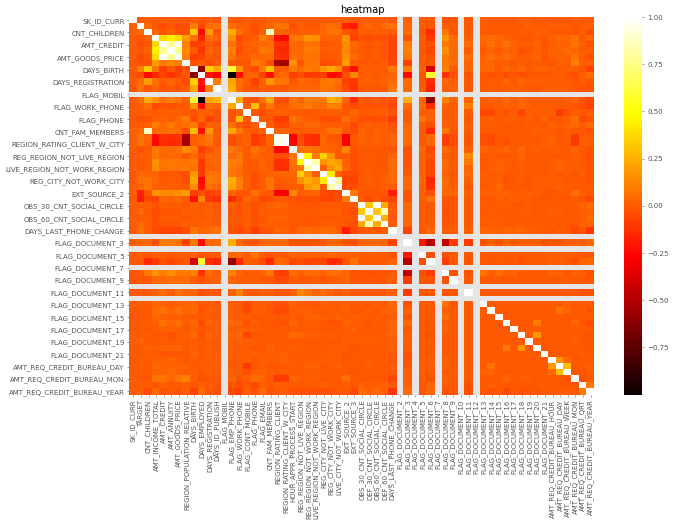

In [8]:
#各特徴量間の相関行列およびヒートマップを作成

import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')

fig1, ax1 = plt.subplots(figsize=(15, 10), dpi=50)

ax1.set_title("heatmap")

import seaborn as sns
sns.heatmap(df3.corr(), ax=ax1, cmap='hot')   #ヒートマップ描画

pd.set_option("display.max_rows", 100)   #行数が100以上の場合、表示を省略
pd.set_option("display.max_columns", 100)  #列数が100以上の場合、表示を省略
display(df3.corr())

####【問題4 解答2】各特徴量間の相関行列およびヒートマップを作成
      ・72個の特徴量のうち、61個のみについて相関係数が出力された。
      　⇒ 値が数値ではなく文字列の特徴量については、df.corr()メソッドでは相関係数が算出されない模様。
      ・相関係数が"NAN"となっている箇所がいくつか見られた。
      　⇒ 値が全く変化しない特徴量についてはNANと表示されている模様。
      ・TARGET変数との相関が比較的大きい特徴量としては下記があったが、いずれも著しく相関があるとまでは言えない。
            <Positive correlation>
              ・DAYS_BIRTH（年齢）                                   0.104328
              ・REGION_RATING_CLIENT_W_CITY（居住地域(都市)の評価）	 0.076488
              ・REGION_RATING_CLIENT（居住地域の評価）	             0.076049
              ・DAYS_ID_PUBLISH（身分証明書の発行からの経過日数）    0.072266
            <Negative correlation>
              ・AMT_GOODS_PRICE（ローンで購入した商品の金額）        -0.051214
              ・EXT_SOURCE_2（外部データソースからの正規化されたスコア） -0.17115
              ・EXT_SOURCE_3（外部データソースからの正規化されたスコア） -0.199337

In [9]:
df3.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [10]:
#データの値が文字列の列について、データを数値へ置換する
df4 = df3.copy()
types_ser = df4.dtypes

for key in df4.columns:
    if (types_ser[key] == "object"):    #データ値が文字列型の列を検索
        #print(key)
        #print(df4.loc[:, key].nunique())
        df4.loc[:, key] = df4.loc[:, key].factorize()[0]    #データ値を文字列⇒数値型へ置換

print("\n")
print("df4:")
display(df4)
print("df4.isnull().sum()")
display(df4.isnull().sum())




df4:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0,0,0,0,0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,0,10,0,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0,0,0,0,0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,1,9,0,0,0,0,0,0,1,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,0,0,0,0,0,99000.0,490495.5,27517.5,454500.0,1,1,0,1,0,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,0,16,0,0,0,0,0,0,2,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,0,1,1,0,1,171000.0,1560726.0,41301.0,1395000.0,0,2,1,1,0,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,2,16,0,0,0,0,0,0,0,0.724000,0.492060,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,0,0,1,0,0,360000.0,1530000.0,42075.0,1530000.0,0,1,1,1,0,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,1,16,0,0,0,0,1,1,2,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,111629,0,1,1,1,0,1,135000.0,270000.0,13500.0,270000.0,0,0,1,1,0,0.019689,-11454,-2699,-2037.0,-1247,1,1,0,1,0,0,3.0,2,2,5,15,0,0,0,0,0,0,0,0.589959,0.515495,7.0,1.0,7.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
9996,111630,0,0,1,1,0,0,166500.0,1006920.0,51543.0,900000.0,0,2,0,1,0,0.025164,-16480,-3929,-2893.0,-15,1,1,0,1,0,0,2.0,2,2,5,13,0,0,0,0,0,0,29,0.519258,0.226347,2.0,1.0,2.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9997,111631,0,0,0,1,0,0,225000.0,497520.0,53581.5,450000.0,0,0,1,1,0,0.019689,-15479,-1369,-224.0,-1272,1,1,1,1,0,0,2.0,2,2,0,12,0,0,0,0,0,0,6,0.022644,0.524496,2.0,0.0,2.0,0.0,-721.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
9998,111632,0,0,1,0,1,0,360000.0,348264.0,27643.5,315000.0,0,2,0,1,0,0.018801,-15939,-1632,-987.0,-2821,1,1,0,1,0,0,2.0,2,2,5,15,0,0,0,0,0,0,0,0.286832,0.301625,0.0,0.0,0.0,0.0,-246.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


df4.isnull().sum()


SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,0.001673,0.004181,-0.003156,-0.005691,0.007621,0.014941,0.002639,0.006582,0.004076,0.005949,-0.007884,-0.026420,-0.010151,-0.008707,0.015058,-0.013878,0.003390,-0.016072,0.000468,-0.016949,NaN,0.015412,-0.007763,0.003096,-0.007411,-0.005086,0.018339,0.010886,0.014219,-0.008194,0.007603,-0.015110,-0.002732,0.002661,-0.015263,-0.000422,0.007902,0.013108,0.009308,-0.004073,0.006624,0.005810,0.006621,0.006410,-0.002576,NaN,0.010591,NaN,-0.009906,-0.004658,NaN,-0.009489,-0.019339,NaN,-0.003746,NaN,0.010120,-0.004056,-0.011256,0.006043,-0.007720,0.013090,0.011055,-0.000311,-0.001374,-0.013721,-0.003284,-0.013913,0.008653,-0.012068,0.000913
TARGET,0.001673,1.000000,-0.034369,-0.060469,-0.014341,0.018110,0.045028,-0.022330,-0.043712,-0.014970,-0.051214,-0.017060,-0.063937,-0.041603,0.003494,0.034267,-0.035404,0.104328,-0.047606,0.050814,0.072266,NaN,0.048967,0.006444,0.001268,-0.033864,0.005010,0.035365,0.076049,0.076488,-0.017428,-0.034413,0.011469,-0.003896,-0.014047,0.037965,0.059387,0.035203,0.018506,-0.171150,-0.199337,0.006769,0.044045,0.007006,0.039500,0.063541,NaN,0.034729,NaN,0.002750,-0.022444,NaN,0.013708,-0.006858,NaN,-0.007357,NaN,0.006695,-0.005244,-0.006366,-0.004213,-0.004501,-0.000072,0.019218,-0.007118,-0.005513,0.008283,0.011993,0.003227,-0.016028,0.004335,0.015446
NAME_CONTRACT_TYPE,0.004181,-0.034369,1.000000,-0.013588,0.008036,-0.062320,0.018315,-0.027597,-0.246297,-0.273666,-0.212761,-0.006603,-0.031490,0.030681,-0.019371,0.022843,0.021253,0.088562,-0.041521,0.017047,0.054264,NaN,0.042179,-0.032171,-0.094795,-0.002750,-0.024003,0.006695,-0.009148,-0.010089,-0.019402,0.021258,0.022407,0.017409,0.008143,0.028231,0.010379,-0.002500,0.024815,0.008661,0.001664,-0.019237,0.000867,-0.020481,-0.008873,0.050408,NaN,-0.490262,NaN,0.014250,-0.098681,NaN,-0.087174,-0.017854,NaN,-0.002876,NaN,0.002623,-0.008327,-0.007280,-0.023842,-0.005147,-0.000678,0.015817,-0.008139,0.060058,0.001444,0.002256,-0.018011,-0.025974,-0.036258,-0.060506
CODE_GENDER,-0.003156,-0.060469,-0.013588,1.000000,-0.352487,-0.042253,-0.075358,-0.191914,-0.011964,-0.064019,-0.014040,0.010622,0.121169,-0.007086,0.092886,-0.041470,-0.010692,-0.167028,0.143939,-0.088943,0.014156,NaN,-0.145306,-0.036506,-0.006629,0.026454,-0.010231,-0.111622,0.022710,0.020495,0.005198,-0.019932,-0.023118,-0.107825,-0.113931,-0.049895,-0.137994,-0.131208,-0.057047,0.005039,0.019445,0.019631,0.039388,0.020937,0.024372,-0.002797,NaN,0.092895,NaN,0.000726,0.092718,NaN,-0.228903,0.005478,NaN,-0.016791,NaN,-0.027458,0.005772,-0.019526,0.010086,-0.022197,-0.018502,-0.013483,-0.024486,-0.027187,-0.013924,-0.002872,0.009229,-0.012316,-0.000050,0.025999
FLAG_O

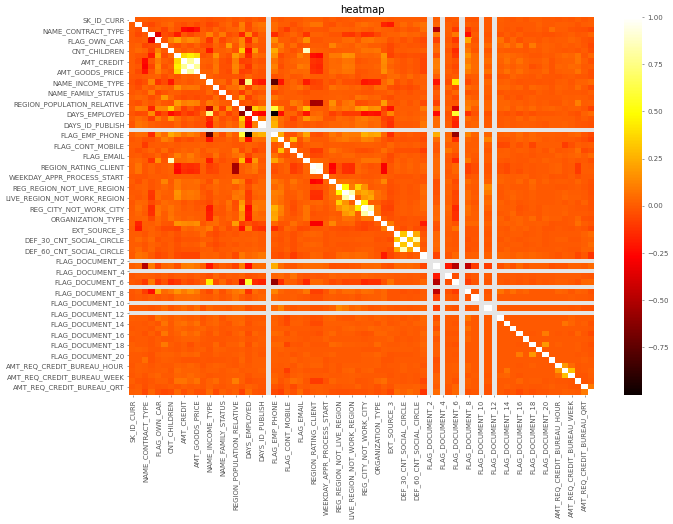

In [11]:
#相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
fig2, ax2 = plt.subplots(figsize=(15, 10), dpi=50)

ax2.set_title("heatmap")

import seaborn as sns
sns.heatmap(df4.corr(), ax=ax2, cmap='hot')   #ヒートマップ描画

pd.set_option("display.max_rows", 100)   #行数が100以上の場合、表示を省略
pd.set_option("display.max_columns", 100)  #列数が100以上の場合、表示を省略
display(df4.corr())

####【問題4 解答3】データ値が文字列の特徴量を文字列⇒数値に変換し、再度相関行列およびヒートマップを作成
      文字列の特徴量も相関係数を求められるようになったことで、以下の特徴量もTARGET変数との相関が比較的大きいことが判明した。
      ・NAME_INCOME_TYPE（収入タイプ／ビジネスマン、産休、など）
      ・CODE_GENDER（性別）

Histgram


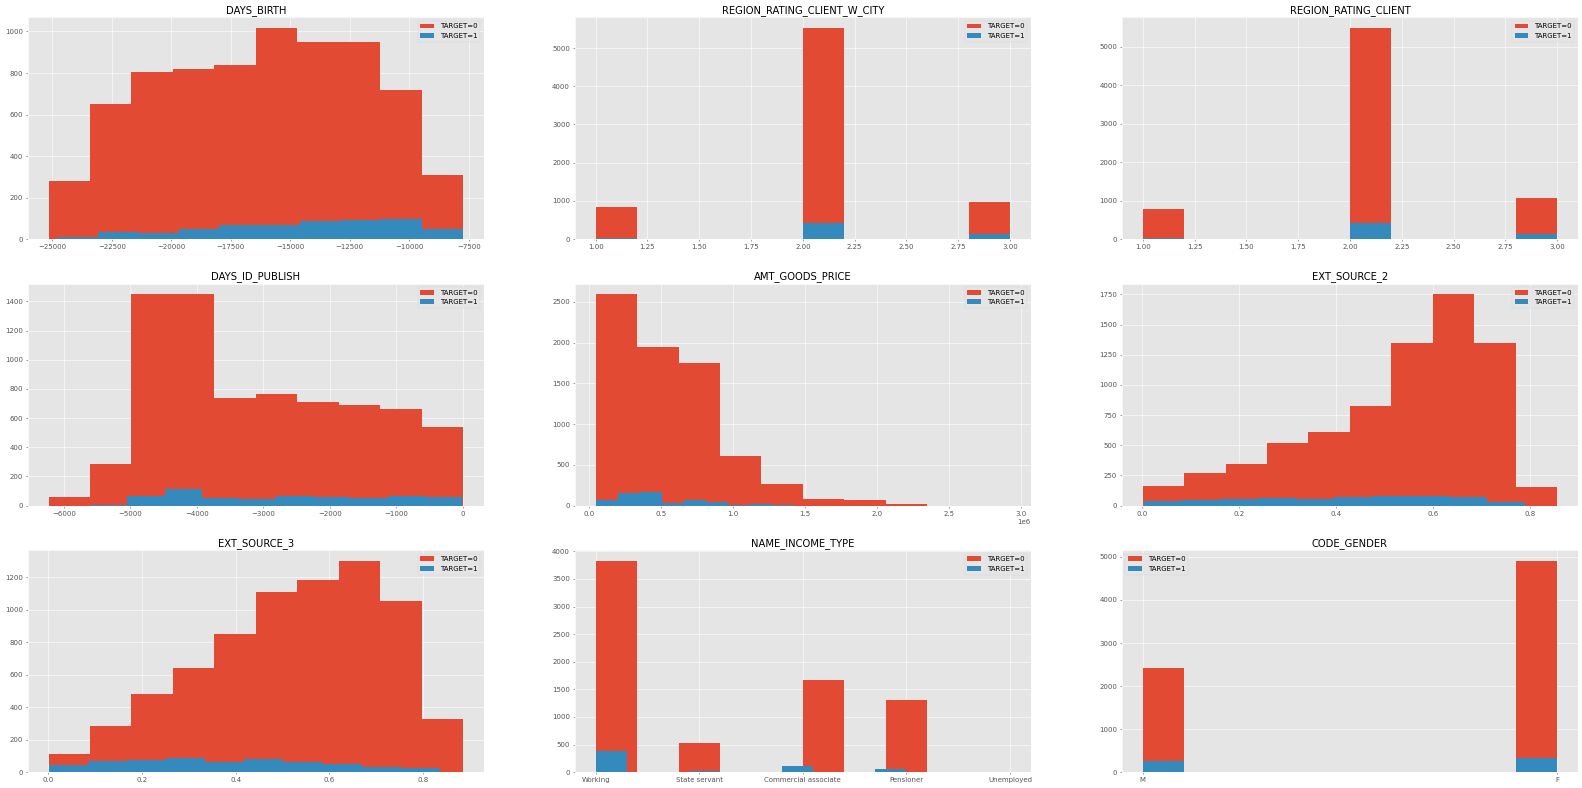

In [12]:
#TARGET変数と相関の高かった特徴量について、ヒストグラムを作成

fig4, ax4 = plt.subplots(3, 3, figsize=(40, 20), dpi=50)

print("Histgram")
ax4[0][0].set_title("DAYS_BIRTH")
ax4[0][0].hist(df3[df3.loc[:, "TARGET"]==0].loc[:, "DAYS_BIRTH"], label="TARGET=0")
ax4[0][0].hist(df3[df3.loc[:, "TARGET"]==1].loc[:, "DAYS_BIRTH"], label="TARGET=1")
ax4[0][0].legend(loc='best') # 凡例を表示
ax4[0][1].set_title("REGION_RATING_CLIENT_W_CITY")
ax4[0][1].hist(df3[df3.loc[:, "TARGET"]==0].loc[:, "REGION_RATING_CLIENT_W_CITY"], label="TARGET=0")
ax4[0][1].hist(df3[df3.loc[:, "TARGET"]==1].loc[:, "REGION_RATING_CLIENT_W_CITY"], label="TARGET=1")
ax4[0][1].legend(loc='best') # 凡例を表示
ax4[0][2].set_title("REGION_RATING_CLIENT")
ax4[0][2].hist(df3[df3.loc[:, "TARGET"]==0].loc[:, "REGION_RATING_CLIENT"], label="TARGET=0")
ax4[0][2].hist(df3[df3.loc[:, "TARGET"]==1].loc[:, "REGION_RATING_CLIENT"], label="TARGET=1")
ax4[0][2].legend(loc='best') # 凡例を表示
ax4[1][0].set_title("DAYS_ID_PUBLISH")
ax4[1][0].hist(df3[df3.loc[:, "TARGET"]==0].loc[:, "DAYS_ID_PUBLISH"], label="TARGET=0")
ax4[1][0].hist(df3[df3.loc[:, "TARGET"]==1].loc[:, "DAYS_ID_PUBLISH"], label="TARGET=1")
ax4[1][0].legend(loc='best') # 凡例を表示
ax4[1][1].set_title("AMT_GOODS_PRICE")
ax4[1][1].hist(df3[df3.loc[:, "TARGET"]==0].loc[:, "AMT_GOODS_PRICE"], label="TARGET=0")
ax4[1][1].hist(df3[df3.loc[:, "TARGET"]==1].loc[:, "AMT_GOODS_PRICE"], label="TARGET=1")
ax4[1][1].legend(loc='best') # 凡例を表示
ax4[1][2].set_title("EXT_SOURCE_2")
ax4[1][2].hist(df3[df3.loc[:, "TARGET"]==0].loc[:, "EXT_SOURCE_2"], label="TARGET=0")
ax4[1][2].hist(df3[df3.loc[:, "TARGET"]==1].loc[:, "EXT_SOURCE_2"], label="TARGET=1")
ax4[1][2].legend(loc='best') # 凡例を表示
ax4[2][0].set_title("EXT_SOURCE_3")
ax4[2][0].hist(df3[df3.loc[:, "TARGET"]==0].loc[:, "EXT_SOURCE_3"], label="TARGET=0")
ax4[2][0].hist(df3[df3.loc[:, "TARGET"]==1].loc[:, "EXT_SOURCE_3"], label="TARGET=1")
ax4[2][0].legend(loc='best') # 凡例を表示
ax4[2][1].set_title("NAME_INCOME_TYPE")
ax4[2][1].hist(df3[df3.loc[:, "TARGET"]==0].loc[:, "NAME_INCOME_TYPE"], label="TARGET=0")
ax4[2][1].hist(df3[df3.loc[:, "TARGET"]==1].loc[:, "NAME_INCOME_TYPE"], label="TARGET=1")
ax4[2][1].legend(loc='best') # 凡例を表示
ax4[2][2].set_title("CODE_GENDER")
ax4[2][2].hist(df3[df3.loc[:, "TARGET"]==0].loc[:, "CODE_GENDER"], label="TARGET=0")
ax4[2][2].hist(df3[df3.loc[:, "TARGET"]==1].loc[:, "CODE_GENDER"], label="TARGET=1")
ax4[2][2].legend(loc='best') # 凡例を表示

plt.show()

####【問題4 解答4】TARGET変数と相関の高かった特徴量について、ヒストグラムを作成
```
      ・"NAME_INCOME_TYPE"にはUnemployed（非雇用）という値があり、TARGET変数との関連がありそうだが、Unemployedである顧客数は顧客数全体に比べて
      　非常に少ないことがヒストグラムから分かる。
      　そのため、Unemployedか否かの情報からTARGET変数を予測することは困難。
      ・上記の９つのヒストグラムの内、TARGET変数が0の場合と1の場合とでグラフの形状に差異がみられたものは以下３つ。
          ・DAYS_BIRTH
          ・EXT_SOURCE_2
          ・EXT_SOURCE_3
```
      上記3つの特徴量について、以降でヒストグラムをさらに詳細に確認する。

Histgram


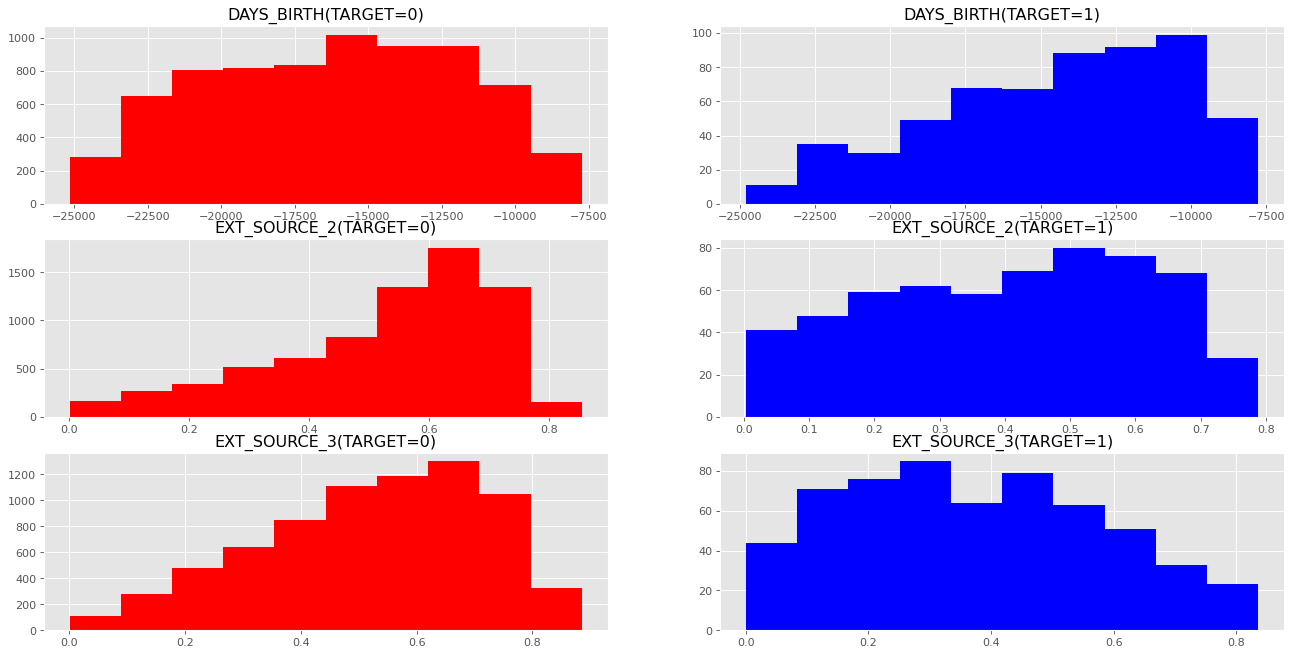

In [13]:
#TARGET変数が0の場合と1の場合とでグラフの形状に差異がみられた3つの特徴量について、ヒストグラムをさらに詳細に確認する

fig5, ax5 = plt.subplots(3,2, figsize=(20, 10), dpi=80)

print("Histgram")

ax5[0][0].set_title("DAYS_BIRTH(TARGET=0)")
ax5[0][0].hist(df3[df3.loc[:, "TARGET"]==0].loc[:, "DAYS_BIRTH"], color="red")
ax5[0][1].set_title("DAYS_BIRTH(TARGET=1)")
ax5[0][1].hist(df3[df3.loc[:, "TARGET"]==1].loc[:, "DAYS_BIRTH"], color="blue")
ax5[1][0].set_title("EXT_SOURCE_2(TARGET=0)")
ax5[1][0].hist(df3[df3.loc[:, "TARGET"]==0].loc[:, "EXT_SOURCE_2"], color="red")
ax5[1][1].set_title("EXT_SOURCE_2(TARGET=1)")
ax5[1][1].hist(df3[df3.loc[:, "TARGET"]==1].loc[:, "EXT_SOURCE_2"], color="blue")
ax5[2][0].set_title("EXT_SOURCE_3(TARGET=0)")
ax5[2][0].hist(df3[df3.loc[:, "TARGET"]==0].loc[:, "EXT_SOURCE_3"], color="red")
ax5[2][1].set_title("EXT_SOURCE_3(TARGET=1)")
ax5[2][1].hist(df3[df3.loc[:, "TARGET"]==1].loc[:, "EXT_SOURCE_3"], color="blue")

plt.show()

####【問題4 解答5】TARGET=0の場合と1の場合とでヒストグラムの形状に差異がみられた特徴量について、ヒストグラムを分けて作成
      ・"DAYS_BIRTH"について、TARGET=1のほうがグラフが右に若干偏っていることから、年齢が低いと返済能力が低いと判断されやすい模様。
      ・"EXT_SOURCE_2"と"EXT_SOURCE_3"について、TARGET=0のグラフは右に偏りがみられるが、一方でTARGET=1については偏りが比較的小さい。
```
以上の解析結果を見ても、TARGET変数の値を精度良く予測する方法が得られなかった。
このことから、application_train.csv以外のデータセットも活用することを検討してみる必要があると判断した。
```